In [1]:
%matplotlib inline

In [2]:
# initialization
import itertools

# use standard rayoptics environment
from rayoptics.environment import *

from rayoptics.optical.elements import Element, Mirror

# util functions
from rayoptics.util.misc_math import normalize

In [3]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [4]:
app = AppManager(None)

# Create a new model

In [5]:
app.model = OpticalModel()
opm = app.model
sm = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model

## Define first order aperture and field for system

In [6]:
osp.pupil = PupilSpec(osp, key=['image', 'f/#'], value=3.5)
osp.field_of_view = FieldSpec(osp, key=['image', 'height'], flds=[0., .7071*3.5, 3.5])
osp.spectral_region = WvlSpec([(486.1327, 0.5), (587.5618, 1.0), (656.2725, 0.5)], ref_wl=1)

## Define interface and gap data for the sequential model

In [7]:
opm.system_spec.title = 'Cell Phone Lens - U.S. Patent 7,535,658'
opm.system_spec.dimensions = 'MM'
opm.radius_mode = True

sm.gaps[0].thi=1e10

sm.add_surface([0., -0.2])
sm.add_surface([1.962, 1.19, 1.471, 76.6])
sm.stop_surface = 2
sm.add_surface([33.398, .93])
sm.add_surface([-2.182, .75, 1.603, 27.5])
sm.add_surface([-6.367, 0.1])
sm.add_surface([5.794, .89, 1.510, 56.2])
sm.add_surface([9.192, .16])
sm.add_surface([1.674, .85, 1.510, 56.2])
sm.add_surface([1.509, .70])
sm.add_surface([0., .40, 1.516, 64.1])
sm.add_surface([0., .64])

asp1 = RadialPolynomial(r=1.962, ec=2.153,
                        coefs=[0., 0., 0., -1.895e-2, 2.426e-2, -5.123e-2, 8.371e-4, 7.850e-3, 4.091e-3, -7.732e-3, -4.265e-3])
asp2 = RadialPolynomial(r=33.398, ec=40.18,
                        coefs=[0., 0., 0., -4.966e-3, -1.434e-2, -6.139e-3, -9.284e-5, 6.438e-3, -5.72e-3, -2.385e-2, 1.108e-2])
asp3 = RadialPolynomial(r=-2.182, ec=2.105,
                        coefs=[0., 0., 0., -4.388e-2, -2.555e-2, 5.16e-2, -4.307e-2, -2.831e-2, 3.162e-2, 4.630e-2, -4.877e-2])
asp4 = RadialPolynomial(r=-6.367, ec=3.382,
                        coefs=[0., 0., 0., -1.131e-1, -7.863e-2, 1.094e-1, 6.228e-3, -2.216e-2, -5.89e-3, 4.123e-3, 1.041e-3])
asp5 = RadialPolynomial(r=5.794, ec=-221.1,
                        coefs=[0., 0., 0., -7.876e-2, 7.02e-2, 5.175e-3, -9.958e-3, -7.322e-3, 6.914e-4, 2.54e-3, -7.65e-4])
asp6 = RadialPolynomial(r=9.192, ec=0.9331,
                        coefs=[0., 0., 0., 9.694e-3, -2.516e-3, -3.606e-3, -2.497e-4, -6.84e-4, -1.414e-4, 2.932e-4, -7.284e-5])
asp7 = RadialPolynomial(r=1.674, ec=-7.617,
                        coefs=[0., 0., 0., 7.429e-2, -6.933e-2, -5.811e-3, 2.396e-3, 2.100e-3, -3.119e-4, -5.552e-5, 7.969e-6])
asp8 = RadialPolynomial(r=1.509, ec=-2.707,
                        coefs=[0., 0., 0., 1.767e-3, -4.652e-2, 1.625e-2, -3.522e-3, -7.106e-4, 3.825e-4, 6.271e-5, -2.631e-5])
sm.ifcs[2].profile = asp1
sm.ifcs[3].profile = asp2
sm.ifcs[4].profile = asp3
sm.ifcs[5].profile = asp4
sm.ifcs[6].profile = asp5
sm.ifcs[7].profile = asp6
sm.ifcs[8].profile = asp7
sm.ifcs[9].profile = asp8


## Update the model

In [8]:
opm.update_model()

In [9]:
sm.list_model()

             r            t        medium     mode   zdr      sd
 Obj:     0.000000  1.00000e+10       air   transmit  1  6.2645e+09
   1:     0.000000    -0.200000       air   transmit  1     0.92344
Stop:     1.962000      1.19000   471.766   transmit  1     0.94346
   3:    33.398000     0.930000       air   transmit  1      1.0863
   4:    -2.182000     0.750000   603.275   transmit  1      1.1337
   5:    -6.367000     0.100000       air   transmit  1      1.5362
   6:     5.794000     0.890000   510.562   transmit  1      1.8593
   7:     9.192000     0.160000       air   transmit  1      2.3609
   8:     1.674000     0.850000   510.562   transmit  1      2.4379
   9:     1.509000     0.700000       air   transmit  1      2.8765
  10:     0.000000     0.400000   516.641   transmit  1      3.2055
  11:     0.000000     0.640000       air   transmit  1      3.2985
 Img:     0.000000      0.00000             transmit  1      3.5438


In [10]:
osp.parax_data.fod.list_first_order_data()

efl               5.587
ffl              -7.801
pp1              -2.214
bfl              0.5824
ppk               5.005
f/#                 3.5
m              -0.01031
red           -1.79e+09
obj_dist          1e+10
obj_ang           32.06
enp_dist           -0.2
enp_radius       0.7982
na obj        7.982e-11
n obj                 1
img_dist           0.64
img_ht              3.5
exp_dist         -3.524
exp_radius       0.5866
na img          -0.1414
n img                 1
optical invariant          0.5


In [11]:
fo.list_parax_trace(opm)

stop surface: 2
           y           u           n*i         ybar         ubar        n*ibar
 0            0  7.98153e-11  7.98153e-11 -6.26446e+09     0.626446     0.626446
 1     0.798153  7.98153e-11  7.98153e-11      0.12529     0.626446     0.626446
 2     0.798153    -0.130255     0.406806  6.89203e-07     0.425864     0.626446
 3     0.643149    -0.182535    -0.163278     0.506779     0.633593     0.648767
 4     0.473391     -0.03226    -0.399488      1.09602     0.584205     0.131292
 5     0.449196   -0.0942549    -0.164806      1.53417     0.791183     0.550226
 6     0.439771   -0.0880559   -0.0183538      1.61329     0.429919      1.06962
 7     0.361401    -0.112913   -0.0735959      1.99592     0.759917     0.977054
 8     0.343335    -0.144048    0.0921857      2.11751    0.0760257      2.02486
 9     0.220894    -0.142857   0.00352712      2.18213     0.852298      2.29837
10     0.120894   -0.0942329    -0.142857      2.77874     0.562202     0.852298
11    0.083200

In [12]:
opm.ele_model.elements_from_sequence(sm)

In [13]:
elmn = [e for e in opm.ele_model.elements if isinstance(e, Element) or isinstance(e, Mirror)]

In [14]:
elmn[0].sd = 1.25
elmn[1].sd = 1.75
elmn[1].flat1 = 1.275
elmn[2].sd = 2.5
elmn[2].flat1 = 2.1
elmn[3].sd = 3.0
elmn[3].flat1 = 2.6
elmn[4].sd = 3.5

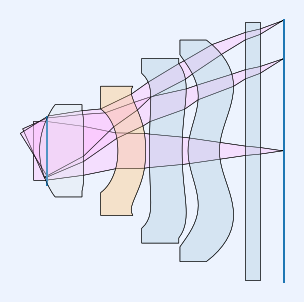

In [15]:
layout_plt = plt.figure(FigureClass=LensLayoutFigure, opt_model=opm).plot()

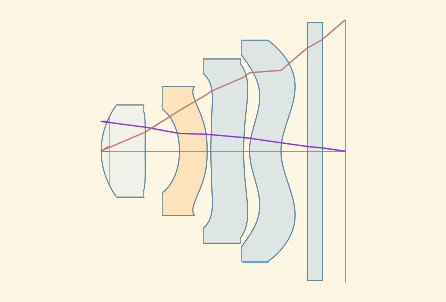

In [16]:
live_layout = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, do_draw_rays=False, refresh_gui=None).plot()

In [17]:
opm.save_model(str(root_pth/"optical/tests/cell_phone_camera"))

In [18]:
opm.ele_model.list_elements()

0: D1 (DummyInterface): Surface(profile=Spherical(c=0.0), interact_mode=transmit)
1: AirGap D1-E1 (AirGap): Gap(t=-0.2, medium=Air)
2: E1 (Element): Element: RadialPolynomial(c=0.509683995922528, ec=2.153, coefs=[0.0, 0.0, 0.0, -0.01895, 0.02426, -0.05123, 0.0008371, 0.00785, 0.004091, -0.007732, -0.004265]), RadialPolynomial(c=0.029941912689382594, ec=40.18, coefs=[0.0, 0.0, 0.0, -0.004966, -0.01434, -0.006139, -9.284e-05, 0.006438, -0.00572, -0.02385, 0.01108]), t=1.1900, sd=1.2500, glass: 471.766
3: AirGap E1-E2 (AirGap): Gap(t=0.93, medium=Air)
4: E2 (Element): Element: RadialPolynomial(c=-0.4582951420714941, ec=2.105, coefs=[0.0, 0.0, 0.0, -0.04388, -0.02555, 0.0516, -0.04307, -0.02831, 0.03162, 0.0463, -0.04877]), RadialPolynomial(c=-0.1570598397989634, ec=3.382, coefs=[0.0, 0.0, 0.0, -0.1131, -0.07863, 0.1094, 0.006228, -0.02216, -0.00589, 0.004123, 0.001041]), t=0.7500, sd=1.7500, glass: 603.275
5: AirGap E2-E3 (AirGap): Gap(t=0.1, medium=Air)
6: E3 (Element): Element: RadialPo

In [19]:
pt0 = np.array([0., 1., 0.])
dir0 = np.array([0., 0., 1.])
wvl = sm.central_wavelength()
marg_ray = rt.trace(sm, pt0, dir0, wvl)
list_ray(marg_ray[0])
#marg_ray

            X            Y            Z           L            M            N               Len
  0:      0.00000      1.00000            0     0.000000     0.000000     1.000000        1e+10
  1:      0.00000      1.00000            0     0.000000     0.000000     1.000000     0.061189
  2:      0.00000      1.00000      0.26119     0.000000    -0.163284     0.986579      0.93632
  3:      0.00000      0.84711   -0.0050525     0.000000    -0.272278     0.962219      0.86687
  4:      0.00000      0.61108     -0.10094     0.000000    -0.024063     0.999710      0.79796
  5:      0.00000      0.59188    -0.053212     0.000000    -0.171810     0.985130      0.16842
  6:      0.00000      0.56295     0.012701     0.000000    -0.123432     0.992353      0.89601
  7:      0.00000      0.45235     0.011856     0.000000    -0.159054     0.987270      0.20161
  8:      0.00000      0.42028     0.050897     0.000000    -0.179409     0.983775      0.83618
  9:      0.00000      0.27027     0.023

In [20]:
start = 1
dir0 = np.array([0.086, 0.173, 0.981])
dir0 = normalize(np.array([0.086, 0.173, 0.981]))
pt1 = np.array([-0.086, -0.173, 0.0])
wvl = sm.central_wavelength()

seq = sm.path(wl=wvl, start=1)
skew_ray = rt.trace_raw(seq, pt1, dir0, wvl)
#skew_ray = rt.trace(sm, pt1, dir0, wvl)

list_ray(skew_ray[0])

            X            Y            Z           L            M            N               Len
  0:     -0.08600     -0.17300            0     0.086014     0.173027     0.981154      -0.1902
  1:     -0.10236     -0.20591     0.013381     0.074993     0.150857     0.985707       1.1937
  2:     -0.01284     -0.02583    1.233e-05     0.110132     0.221545     0.968911      0.94931
  3:      0.09171      0.18448    -0.010186     0.085720     0.172437     0.981284      0.75907
  4:      0.15678      0.31537    -0.015328     0.109689     0.220654     0.969165      0.12688
  5:      0.17069      0.34337     0.007641     0.068298     0.137390     0.988160      0.90905
  6:      0.23278      0.46827     0.015931     0.117690     0.236749     0.964416      0.24565
  7:      0.26169      0.52642     0.092837     0.034732     0.069869     0.996951      0.88153
  8:      0.29231      0.58801      0.12168     0.129560     0.260626     0.956707      0.60449
  9:      0.37063      0.74556          

In [21]:
fld, wvl, foc = osp.lookup_fld_wvl_focus(1)

In [22]:
ray_f1_r0 = trace_base(opm, [0., 0.], fld, wvl)
list_ray(ray_f1_r0[0])

            X            Y            Z           L            M            N               Len
  0:      0.00000 -4429600648.39348            0     0.000000     0.405005     0.914315   1.0937e+10
  1:      0.00000      0.08859            0     0.000000     0.405005     0.914315     -0.21874
  2:      0.00000      0.00000   1.4501e-14     0.000000     0.275326     0.961351       1.2392
  3:      0.00000      0.34119    0.0013257     0.000000     0.407921     0.913017       0.8694
  4:      0.00000      0.69584      -0.1349     0.000000     0.405346     0.914163      0.76875
  5:      0.00000      1.00745     -0.18213     0.000000     0.430114     0.902775       0.3509
  6:      0.00000      1.15838     0.034659     0.000000     0.269449     0.963015      0.99156
  7:      0.00000      1.42555     0.099546     0.000000     0.450135     0.892960      0.37032
  8:      0.00000      1.59225      0.27022     0.000000     0.331913     0.943310       1.0062
  9:      0.00000      1.92623     

In [23]:
ray_f1_py = trace_base(opm, [0., 1.], fld, wvl)
list_ray(ray_f1_py[0])

            X            Y            Z           L            M            N               Len
  0:      0.00000 -4429600648.39348            0     0.000000     0.405005     0.914315   1.0937e+10
  1:      0.00000      0.88674            0     0.000000     0.405005     0.914315    0.0060334
  2:      0.00000      0.88919      0.20552     0.000000     0.098909     0.995096      0.96929
  3:      0.00000      0.98506    -0.019945     0.000000     0.069862     0.997557      0.60449
  4:      0.00000      1.02729     -0.34693     0.000000     0.340701     0.940172      0.83818
  5:      0.00000      1.31286     -0.30889     0.000000     0.316325     0.948651      0.47397
  6:      0.00000      1.46279     0.040733     0.000000     0.217006     0.976170       0.9829
  7:      0.00000      1.67608      0.11021     0.000000     0.326393     0.945234      0.30464
  8:      0.00000      1.77551      0.23816     0.000000     0.299944     0.953957      0.99622
  9:      0.00000      2.07432     

In [24]:
ray_f1_my = trace_base(opm, [0., -1.], fld, wvl)
list_ray(ray_f1_my[0])

            X            Y            Z           L            M            N               Len
  0:      0.00000 -4429600648.39348            0     0.000000     0.405005     0.914315   1.0937e+10
  1:      0.00000     -0.70956            0     0.000000     0.405005     0.914315    -0.065868
  2:      0.00000     -0.73624      0.13978     0.000000     0.391012     0.920386       1.1422
  3:      0.00000     -0.28963    0.0010232     0.000000     0.572065     0.820209       1.0979
  4:      0.00000      0.33844    -0.028467     0.000000     0.426087     0.904682      0.78103
  5:      0.00000      0.67123    -0.071879     0.000000     0.529746     0.848157      0.22585
  6:      0.00000      0.79087     0.019679     0.000000     0.337853     0.941199       1.0001
  7:      0.00000      1.12875      0.07094     0.000000     0.574321     0.818630      0.44223
  8:      0.00000      1.38273      0.27296     0.000000     0.354953     0.934884       1.0265
  9:      0.00000      1.74710     